## 1 - Definição dos Dados


### 1.1 -Qual o cenário em que está trabalhando?

Dados de passagens de trem no Reino Unido, de janeiro a abril de 2024

### 1.2 - Qual a problemática que está tentando resolver?

Prever se uma viagem de trem sofrerá atraso com base

### 1.2 - Qual a problemática que está tentando resolver?

Informar passageiros de atrasos em potencial ou ajudar companhia ferroviárias a ajustar seus horários.

## 2 - Processamento de dados

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
data = pd.read_csv('data/railway.csv')

In [42]:
data.value_counts()

Transaction ID           Date of Purchase  Time of Purchase  Purchase Type  Payment Method  Railcard  Ticket Class  Ticket Type  Price  Departure Station      Arrival Destination    Date of Journey  Departure Time  Arrival Time  Actual Arrival Time  Journey Status  Reason for Delay  Refund Request
ffe0ebd9-bf00-42c1-a27b  2024-01-19        18:14:41          Station        Debit Card      Adult     Standard      Advance      50     Liverpool Lime Street  London Euston          2024-01-20       17:30:00        19:45:00      20:01:00             Delayed         Technical Issue   Yes               1
0003be8d-7821-479f-b9ec  2024-02-16        18:10:42          Station        Debit Card      Adult     Standard      Advance      56     Manchester Piccadilly  London Euston          2024-02-23       17:30:00        19:20:00      19:32:00             Delayed         Technical Issue   Yes               1
faf1f87c-c958-4805-8e07  2024-04-24        14:52:21          Station        Debit Card      S

In [43]:
# Create time-based features
data['Date of Journey'] = pd.to_datetime(data['Date of Journey'])
data['Day of Week'] = data['Date of Journey'].dt.dayofweek
data['Is Weekend'] = data['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

In [44]:
# Calculate delay duration (if Actual Arrival Time is after Arrival Time)
data['Scheduled Arrival Time'] = pd.to_datetime(data['Arrival Time'])
data['Actual Arrival Time'] = pd.to_datetime(data['Actual Arrival Time'])
data['Delay Duration (min)'] = (data['Actual Arrival Time'] - data['Scheduled Arrival Time']).dt.total_seconds() / 60
data['Is Delayed'] = data['Delay Duration (min)'].apply(lambda x: 1 if x > 0 else 0)


/tmp/ipykernel_6463/416629548.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Scheduled Arrival Time'] = pd.to_datetime(data['Arrival Time'])
/tmp/ipykernel_6463/416629548.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Actual Arrival Time'] = pd.to_datetime(data['Actual Arrival Time'])


In [45]:
# Encode categorical features
le = LabelEncoder()
data['Departure Station Encoded'] = le.fit_transform(data['Departure Station'])
data['Arrival Destination Encoded'] = le.fit_transform(data['Arrival Destination'])
data['Ticket Class Encoded'] = le.fit_transform(data['Ticket Class'])

## 3 - Análise exploratória dos dados

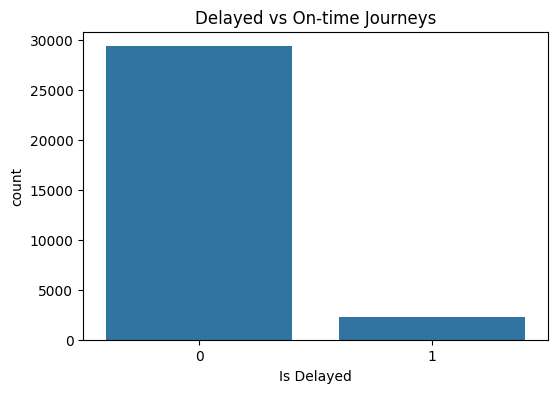

In [46]:
# Distribution of Delays
plt.figure(figsize=(6, 4))
sns.countplot(x='Is Delayed', data=data)
plt.title('Delayed vs On-time Journeys')
plt.show()

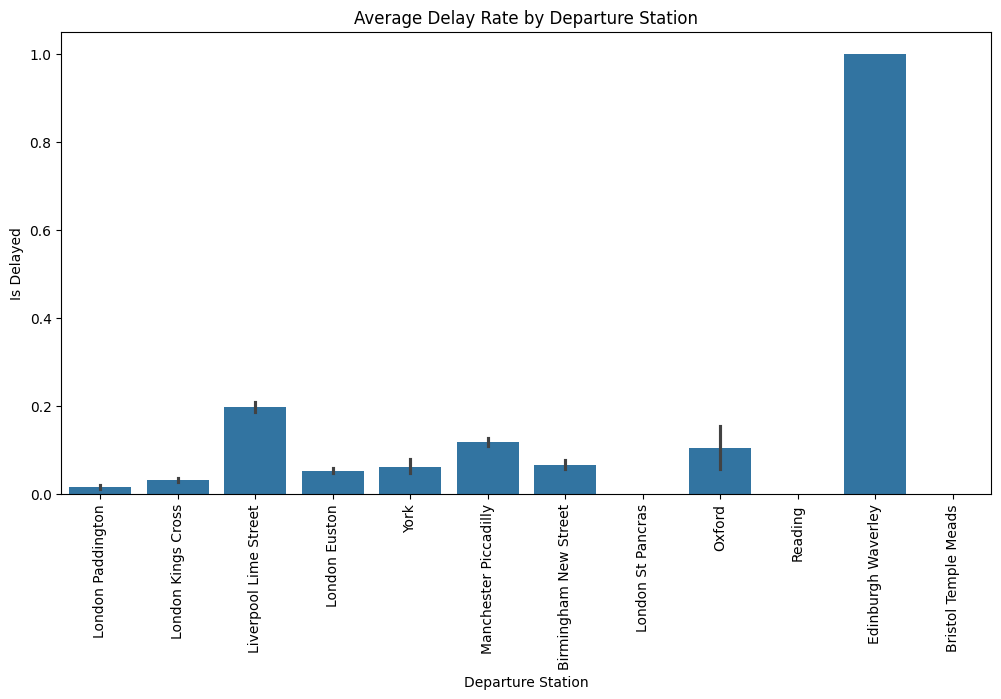

In [47]:
# Station-specific analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Departure Station', y='Is Delayed', data=data, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Average Delay Rate by Departure Station')
plt.show()

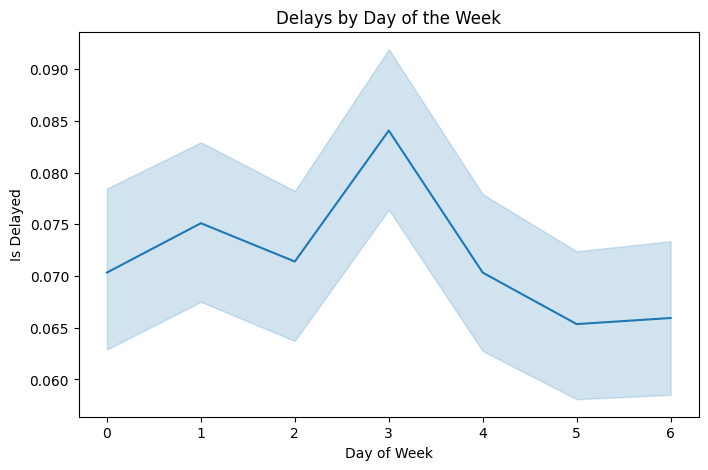

In [48]:
# Time-based patterns (Day of Week)
plt.figure(figsize=(8, 5))
sns.lineplot(x='Day of Week', y='Is Delayed', data=data)
plt.title('Delays by Day of the Week')
plt.show()

## 4 - Seleção de Features

In [49]:
# Define feature set and target variable
X = data[['Departure Station Encoded', 'Arrival Destination Encoded', 
          'Ticket Class Encoded', 'Day of Week', 'Is Weekend']]
y = data['Is Delayed']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5 - Modelagem

In [50]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, use a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Accuracy: 0.9286052756278629
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      5879
           1       0.00      0.00      0.00       452

    accuracy                           0.93      6331
   macro avg       0.46      0.50      0.48      6331
weighted avg       0.86      0.93      0.89      6331



/home/daniel/Documents/projects/estudos/train_delay/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/daniel/Documents/projects/estudos/train_delay/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/daniel/Documents/projects/estudos/train_delay/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

Random Forest Accuracy: 0.9488232506712999
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5879
           1       0.70      0.50      0.58       452

    accuracy                           0.95      6331
   macro avg       0.83      0.74      0.78      6331
weighted avg       0.94      0.95      0.94      6331



In [51]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"---{model_name}---")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("\n")

In [52]:
# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Train Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

# Train Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(**params, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

TypeError: GradientBoostingClassifier.__init__() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [18]:
# Evaluate all models
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

---Logistic Regression---
MAE: 0.0713947243721371
MSE: 0.0713947243721371
RMSE: 0.2671979123648557


---Decision Tree---
MAE: 0.05212446690886116
MSE: 0.05212446690886116
RMSE: 0.22830783365636223


---Gradient Boosting---
MAE: 0.05054493760859264
MSE: 0.05054493760859264
RMSE: 0.22482201317618486




### Printing results

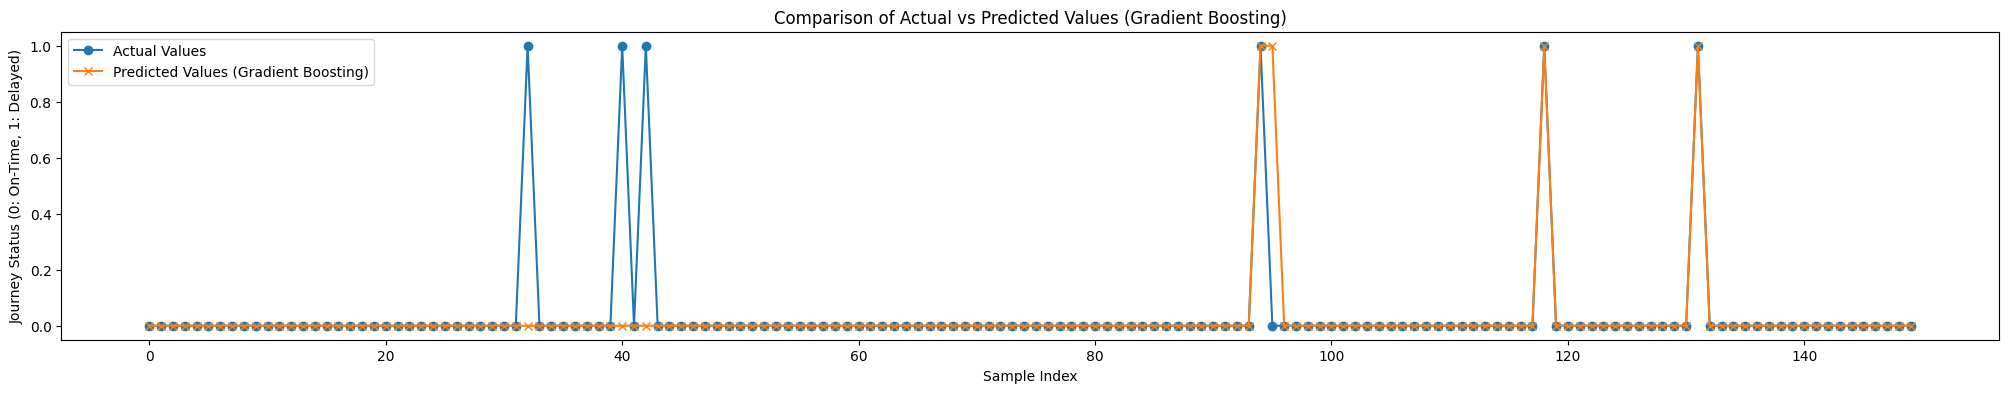

In [38]:
plt.figure(figsize=(25, 4))

plt.plot(y_test.values[:150], label="Actual Values", marker='o')

plt.plot(y_pred_decision_tree[:150], label="Predicted Values (Gradient Boosting)", marker='x')

plt.title("Comparison of Actual vs Predicted Values (Gradient Boosting)")
plt.xlabel("Sample Index")
plt.ylabel("Journey Status (0: On-Time, 1: Delayed)")
plt.legend()

plt.show()

### WINNER: Gradient Boosting 

Logistic Regression performed the worst of the three models in terms of both MAE and RMSE, indicating that its predictions were less accurate. As a linear model, it may not capture complex patterns in the dataset, leading to relatively higher errors.

The Decision Tree model showed a significant improvement over Logistic Regression. It captured the non-linear relationships in the data better, resulting in lower MAE and RMSE values. However, decision trees can sometimes overfit the training data, leading to reduced generalization performance.

Gradient Boosting achieved the best performance among the three models, with the lowest MAE, MSE, and RMSE. This indicates that it made more accurate predictions and had better generalization to unseen data. Gradient Boosting's ability to iteratively improve weak models likely contributed to its superior results.

In [39]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0]
# }

# # Instantiate the model
# gb = GradientBoostingClassifier(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Print the best parameters and score
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best accuracy: {grid_search.best_score_}")


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best accuracy: 0.9489771282958193
